In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [58]:
reviews=pd.read_csv('extract_reviews.csv')
reviews

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The book i...
1,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n It is as s...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I like the...
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good conte...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I bought i...
...,...,...
1195,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Nice book ...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good\n\n \n
1197,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Great prod...
1198,2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Books are ...


In [59]:
reviews=[comment.strip() for comment in reviews.comment] 
reviews=[comment for comment in reviews if comment] 
reviews[0:10]

['The book is nice and I bought it for my year toddler he enjoyed it and developed a liking for it, by just asking him to bring his books he could signal for the library but after a month instead of looking at the books he started nibbling on it, as the books are hardbound he was able to swallow the cardboard making the edges soggy. I have to keep it away now. I try interacting with him orally but somehow I want him to get acquainted with books. The only thing I wish was if the books were washable.',
 'It is as shown in image. Quality of the book is good, they are board books so not tearable. Shapes, vegetables, transport & colors books cannot be used now as my daughter is just turning a year old but can be used later. In the books for eg. Animal books animals like llama in bird book emu, hornbill; how can 1 year old understand that, books should be simpler for them to understand. I think buying all the books is not needed at once.',
 'I like the size and quality of the books. My 1-yea

In [60]:
reviews_text=' '.join(reviews)
reviews_text

'The book is nice and I bought it for my year toddler he enjoyed it and developed a liking for it, by just asking him to bring his books he could signal for the library but after a month instead of looking at the books he started nibbling on it, as the books are hardbound he was able to swallow the cardboard making the edges soggy. I have to keep it away now. I try interacting with him orally but somehow I want him to get acquainted with books. The only thing I wish was if the books were washable. It is as shown in image. Quality of the book is good, they are board books so not tearable. Shapes, vegetables, transport & colors books cannot be used now as my daughter is just turning a year old but can be used later. In the books for eg. Animal books animals like llama in bird book emu, hornbill; how can 1 year old understand that, books should be simpler for them to understand. I think buying all the books is not needed at once. I like the size and quality of the books. My 1-year-old dau

In [61]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'The book is nice and I bought it for my year toddler he enjoyed it and developed a liking for it by just asking him to bring his books he could signal for the library but after a month instead of looking at the books he started nibbling on it as the books are hardbound he was able to swallow the cardboard making the edges soggy I have to keep it away now I try interacting with him orally but somehow I want him to get acquainted with books The only thing I wish was if the books were washable It is as shown in image Quality of the book is good they are board books so not tearable Shapes vegetables transport  colors books cannot be used now as my daughter is just turning a year old but can be used later In the books for eg Animal books animals like llama in bird book emu hornbill how can 1 year old understand that books should be simpler for them to understand I think buying all the books is not needed at once I like the size and quality of the books My 1yearold daughter likes to read th

In [62]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:20])

['The', 'book', 'is', 'nice', 'and', 'I', 'bought', 'it', 'for', 'my', 'year', 'toddler', 'he', 'enjoyed', 'it', 'and', 'developed', 'a', 'liking', 'for']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
len(text_tokens)

28707

In [64]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('I')
my_stop_words.append('It')
my_stop_words.append('The')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['book', 'nice', 'bought', 'year', 'toddler', 'enjoyed', 'developed', 'liking', 'asking', 'bring', 'books', 'could', 'signal', 'library', 'month', 'instead', 'looking', 'books', 'started', 'nibbling', 'books', 'hardbound', 'able', 'swallow', 'cardboard', 'making', 'edges', 'soggy', 'keep', 'away', 'try', 'interacting', 'orally', 'somehow', 'want', 'get', 'acquainted', 'books', 'thing', 'wish']


In [65]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['book', 'nice', 'bought', 'year', 'toddler', 'enjoyed', 'developed', 'liking', 'asking', 'bring', 'books', 'could', 'signal', 'library', 'month', 'instead', 'looking', 'books', 'started', 'nibbling', 'books', 'hardbound', 'able', 'swallow', 'cardboard', 'making', 'edges', 'soggy', 'keep', 'away', 'try', 'interacting', 'orally', 'somehow', 'want', 'get', 'acquainted', 'books', 'thing', 'wish', 'books', 'washable', 'shown', 'image', 'quality', 'book', 'good', 'board', 'books', 'tearable', 'shapes', 'vegetables', 'transport', 'colors', 'books', 'used', 'daughter', 'turning', 'year', 'old', 'used', 'later', 'in', 'books', 'eg', 'animal', 'books', 'animals', 'like', 'llama', 'bird', 'book', 'emu', 'hornbill', '1', 'year', 'old', 'understand', 'books', 'simpler', 'understand', 'think', 'buying', 'books', 'needed', 'like', 'size', 'quality', 'books', 'my', '1yearold', 'daughter', 'likes', 'read', 'every', 'dayconsp', 'pizza', 'seriously', 'p', 'okay', 'though', 'good', 'content', 'thick', 'p

In [66]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['book', 'nice', 'bought', 'year', 'toddler', 'enjoy', 'develop', 'like', 'ask', 'bring', 'book', 'could', 'signal', 'librari', 'month', 'instead', 'look', 'book', 'start', 'nibbl', 'book', 'hardbound', 'abl', 'swallow', 'cardboard', 'make', 'edg', 'soggi', 'keep', 'away', 'tri', 'interact', 'oral', 'somehow', 'want', 'get', 'acquaint', 'book', 'thing', 'wish', 'book', 'washabl', 'shown', 'imag', 'qualiti', 'book', 'good', 'board', 'book', 'tearabl', 'shape', 'veget', 'transport', 'color', 'book', 'use', 'daughter', 'turn', 'year', 'old', 'use', 'later', 'in', 'book', 'eg', 'anim', 'book', 'anim', 'like', 'llama', 'bird', 'book', 'emu', 'hornbil', '1', 'year', 'old', 'understand', 'book', 'simpler', 'understand', 'think', 'buy', 'book', 'need', 'like', 'size', 'qualiti', 'book', 'my', '1yearold', 'daughter', 'like', 'read', 'everi', 'dayconsp', 'pizza', 'serious', 'p', 'okay', 'though', 'good', 'content', 'thick', 'page', 'varieti', 'topic', 'pictur', 'easi', 'leaner', 'child', 'unders

In [67]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

book nice bought year toddler enjoyed developed liking asking bring books could signal library month instead looking books started nibbling books hardbound able swallow cardboard making edges soggy keep away try interacting orally somehow want get acquainted books thing wish books washable shown image quality book good board books tearable shapes vegetables transport colors books used daughter turning year old used later in books eg animal books animals like llama bird book emu hornbill 1 year old understand books simpler understand think buying books needed like size quality books my 1yearold daughter likes read every dayconsp pizza seriously p okay though good content thick pages variety topics pictures easy leaner child understand will definitely guide learn got two pages repeating wrong picture like vehicle pictures farm animal topic bought 15yrs old kid book fits well hands easy play aroundothers complained small size need understand kids flip anything bigger would heavy engaging 

In [68]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['book', 'nice', 'buy', 'year', 'toddler', 'enjoyed', 'develop', 'like', 'ask', 'bring', 'book', 'could', 'signal', 'library', 'month', 'instead', 'look', 'book', 'start', 'nibble', 'book', 'hardbound', 'able', 'swallow', 'cardboard', 'make', 'edge', 'soggy', 'keep', 'away', 'try', 'interact', 'orally', 'somehow', 'want', 'get', 'acquaint', 'book', 'thing', 'wish', 'book', 'washable', 'show', 'image', 'quality', 'book', 'good', 'board', 'book', 'tearable', 'shape', 'vegetable', 'transport', 'color', 'book', 'use', 'daughter', 'turn', 'year', 'old', 'use', 'later', 'in', 'book', 'eg', 'animal', 'book', 'animal', 'like', 'llama', 'bird', 'book', 'emu', 'hornbill', '1', 'year', 'old', 'understand', 'book', 'simple', 'understand', 'think', 'buy', 'book', 'need', 'like', 'size', 'quality', 'book', 'my', '1yearold', 'daughter', 'like', 'read', 'every', 'dayconsp', 'pizza', 'seriously', 'p', 'okay', 'though', 'good', 'content', 'thick', 'page', 'variety', 'topic', 'picture', 'easy', 'lean', '

In [69]:
clean_reviews=' '.join(lemmas)
clean_reviews

"book nice buy year toddler enjoyed develop like ask bring book could signal library month instead look book start nibble book hardbound able swallow cardboard make edge soggy keep away try interact orally somehow want get acquaint book thing wish book washable show image quality book good board book tearable shape vegetable transport color book use daughter turn year old use later in book eg animal book animal like llama bird book emu hornbill 1 year old understand book simple understand think buy book need like size quality book my 1yearold daughter like read every dayconsp pizza seriously p okay though good content thick page variety topic picture easy lean child understand will definitely guide learn get two page repeat wrong picture like vehicle picture farm animal topic buy 15yrs old kid book fit well hand easy play aroundother complain small size need understand kid flip anything big would heavy engage small child my daughter 15 month old hooked book many picture good colour com

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [71]:
print(cv.vocabulary_)

{'book': 336, 'nice': 1443, 'buy': 411, 'year': 2353, 'toddler': 2151, 'enjoyed': 752, 'develop': 651, 'like': 1280, 'ask': 218, 'bring': 398, 'could': 575, 'signal': 1903, 'library': 1273, 'month': 1392, 'instead': 1132, 'look': 1306, 'start': 2009, 'nibble': 1442, 'hardbound': 1008, 'able': 109, 'swallow': 2054, 'cardboard': 433, 'make': 1325, 'edge': 715, 'soggy': 1967, 'keep': 1189, 'away': 249, 'try': 2190, 'interact': 1136, 'orally': 1518, 'somehow': 1973, 'want': 2275, 'get': 901, 'acquaint': 118, 'thing': 2112, 'wish': 2318, 'washable': 2277, 'show': 1899, 'image': 1084, 'quality': 1721, 'good': 924, 'board': 331, 'tearable': 2072, 'shape': 1889, 'vegetable': 2250, 'transport': 2183, 'color': 503, 'use': 2224, 'daughter': 608, 'turn': 2191, 'old': 1499, 'later': 1243, 'in': 1103, 'eg': 726, 'animal': 181, 'llama': 1296, 'bird': 320, 'emu': 741, 'hornbill': 1054, 'understand': 2205, 'simple': 1907, 'think': 2117, 'need': 1429, 'size': 1919, 'my': 1415, '1yearold': 33, 'read': 17

In [72]:
print(cv.get_feature_names()[150:300])

['airplane', 'al', 'alfabet', 'all', 'allclear', 'allhe', 'allow', 'allworth', 'almost', 'alone', 'along', 'alot', 'alphabet', 'alphabetsthe', 'already', 'also', 'alternative', 'although', 'always', 'alwaysdelivere', 'amaze', 'amazed', 'amazing', 'amazingi', 'amazingly', 'amazon', 'amazone', 'american', 'amlost', 'amount', 'and', 'animal', 'animalsbird', 'animalsfruitsvegetable', 'animate', 'anither', 'another', 'ant', 'any', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'apartwhen', 'apko', 'appeal', 'appear', 'appearance', 'appel', 'apple', 'apply', 'appreciate', 'apprehensive', 'appropriate', 'apt', 'aptly', 'area', 'around', 'aroundlovely', 'aroundother', 'arrange', 'arrangment', 'arrival', 'arrive', 'article', 'as', 'aside', 'ask', 'aso', 'assemble', 'asset', 'assorted', 'assume', 'assumed', 'at', 'ate', 'atleast', 'attach', 'attention', 'atteractive', 'attract', 'attractive', 'attractiveeasy', 'attractivequality', 'atttactive', 'audience', 'authentic', 'autism', 'av', 'av

In [73]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [74]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [75]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', '15', 'also', 'amazing', 'amazon', 'animal', 'attractive', 'awesome', 'baby', 'big', 'bit', 'board', 'book', 'box', 'buy', 'can', 'child', 'clear', 'collection', 'color', 'colour', 'colourful', 'content', 'could', 'daughter', 'do', 'easily', 'easy', 'enjoy', 'excellent', 'first', 'get', 'gift', 'give', 'go', 'good', 'great', 'hand', 'happy', 'hard', 'he', 'hold', 'image', 'its', 'keep', 'kid', 'learn', 'library', 'like', 'little', 'look', 'lot', 'love', 'make', 'many', 'material', 'money', 'month', 'much', 'must', 'my', 'nice', 'not', 'old', 'one', 'page', 'paper', 'perfect', 'picture', 'play', 'price', 'print', 'product', 'purchase', 'quality', 'read', 'really', 'recommend', 'see', 'set', 'she', 'show', 'size', 'small', 'son', 'start', 'tear', 'they', 'thick', 'thing', 'this', 'time', 'toddler', 'use', 'useful', 'very', 'well', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

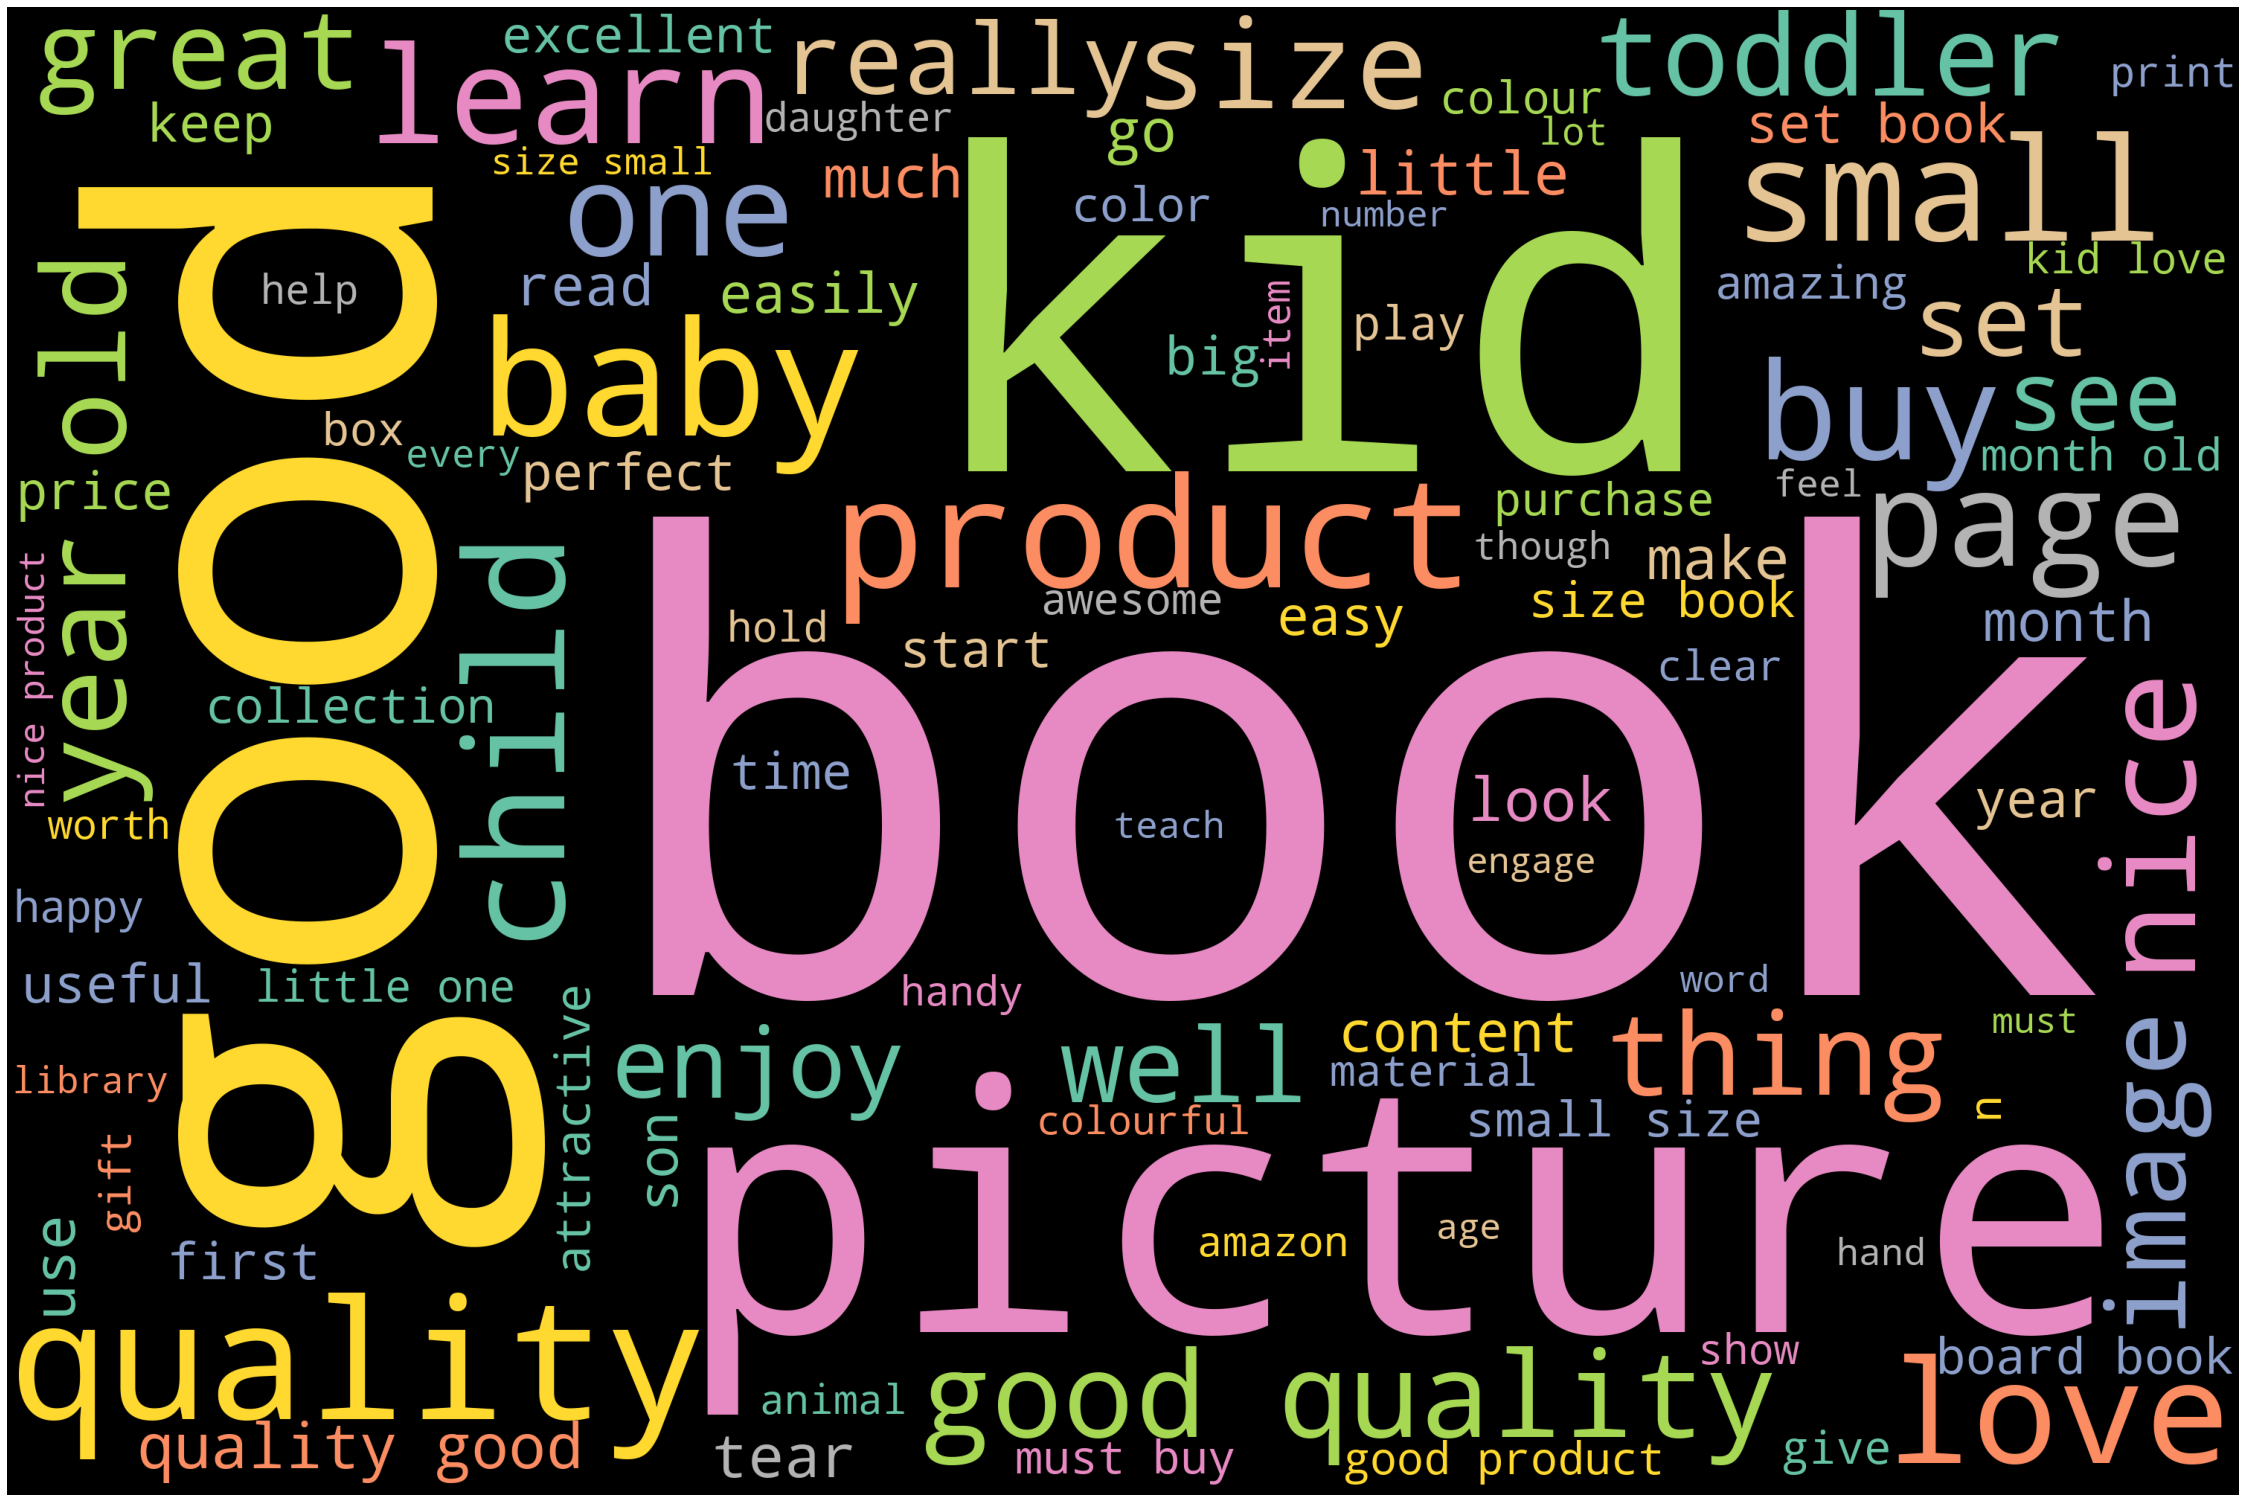

In [77]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_reviews)
# Plot
plot_cloud(wordcloud)

In [78]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [79]:
for token in doc_block[100:200]:
    print(token,token.pos_)

though SCONJ
good ADJ
content NOUN
thick ADJ
page NOUN
variety NOUN
topic NOUN
picture NOUN
easy ADJ
lean ADJ
child NOUN
understand VERB
will AUX
definitely ADV
guide VERB
learn VERB
get VERB
two NUM
page NOUN
repeat VERB
wrong ADJ
picture NOUN
like ADP
vehicle NOUN
picture NOUN
farm NOUN
animal NOUN
topic NOUN
buy VERB
15yrs NOUN
old ADJ
kid NOUN
book NOUN
fit ADJ
well ADV
hand NOUN
easy ADJ
play NOUN
aroundother NOUN
complain VERB
small ADJ
size NOUN
need VERB
understand VERB
kid NOUN
flip VERB
anything PRON
big ADJ
would AUX
heavy ADV
engage VERB
small ADJ
child NOUN
my PRON
daughter NOUN
15 NUM
month NOUN
old ADJ
hooked ADJ
book NOUN
many ADJ
picture VERB
good ADJ
colour NOUN
combinationscurvy NOUN
end NOUN
safe ADJ
child NOUN
hard ADV
bind NOUN
easy ADJ
tear ADJ
small ADJ
size NOUN
fit ADJ
easily ADV
hand VERB
great ADJ
variety NOUN
10 NUM
book NOUN
different ADJ
subjectsthe VERB
good ADJ
part NOUN
deal VERB
cheap ADJ
product NOUN
kind NOUN
check VERB
label NOUN
say VERB
we PRON
d

In [80]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['combinationscurvy', 'end', 'child', 'bind', 'size', 'hand', 'variety', 'book', 'subjectsthe', 'part', 'deal', 'product', 'kind', 'check', 'label', 'say', 'dollar', 'rupee', 'set', 'booksi', 'set', 'e', 'book', 'toddler', 'love', 'carry', 'keep', 'toddler', 'engage', 'occupiedthey', 'help', 'keep', 'kid', 'tv', 'e', 'inculcate', 'habit', 'read', 'buy', 'parent', 'increase', 'interaction', 'help', 'bond', 'grow', 'picture', 'book', 'upto', 'year', 'baby', 'book', '15yr', 'baby', 'loves', 'read', 'book', 'identify', 'fruit', 'shape', 'colour', 'vehicle', 'animal', 'vegetable', 'number', 'leant', 'alphabet', 'help', 'book', 'purchase', 'mother', 'kid', 'age', 'group', 'quality', 'book', 'purchase', 'carry', 'toddler', 'hold', 'grip', 'handstoddler', 'attract', 'colour', 'picture', 'kiddy', 'love', 'thank', 'amazon', 'set', 'book', 'nephew', 'love', 'walk', 'ask', 'read', 'book', 'take', 'beat', 'tantrum', 'fingering']


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,book,905
1,quality,365
2,kid,310
3,love,231
4,product,228
5,size,225
6,picture,221
7,baby,216
8,buy,177
9,page,172


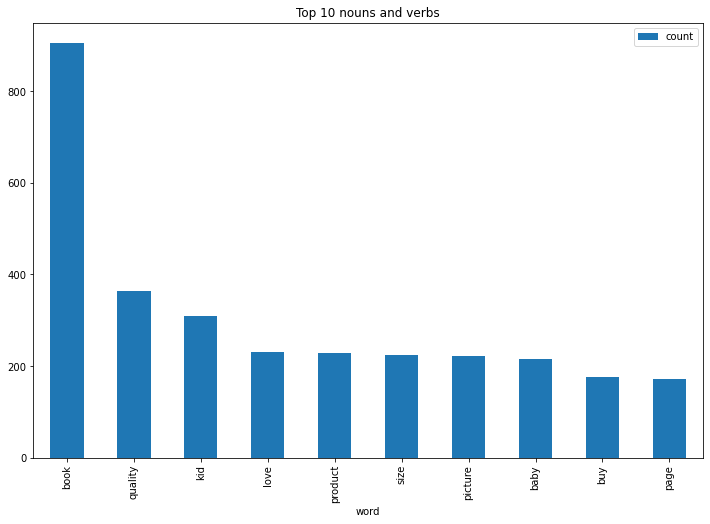

In [82]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [83]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['The book is nice and I bought it for my year toddler he enjoyed it and developed a liking for it, by just asking him to bring his books he could signal for the library but after a month instead of looking at the books he started nibbling on it, as the books are hardbound he was able to swallow the cardboard making the edges soggy.',
 'I have to keep it away now.',
 'I try interacting with him orally but somehow I want him to get acquainted with books.',
 'The only thing I wish was if the books were washable.',
 'It is as shown in image.',
 'Quality of the book is good, they are board books so not tearable.',
 'Shapes, vegetables, transport & colors books cannot be used now as my daughter is just turning a year old but can be used later.',
 'In the books for eg.',
 'Animal books animals like llama in bird book emu, hornbill; how can 1 year old understand that, books should be simpler for them to understand.',
 'I think buying all the books is not needed at once.',
 'I like the size an

In [84]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,The book is nice and I bought it for my year t...
1,I have to keep it away now.
2,I try interacting with him orally but somehow ...
3,The only thing I wish was if the books were wa...
4,It is as shown in image.
...,...
2083,Its so helpful.
2084,Good for the kids range 2-4 years great pictur...
2085,with lot of content.
2086,Excellent books...my nephew liked it .. worth ...


In [85]:
affin=pd.read_csv('D:/study docs/Excel R/Study/Text mining/Afinn.csv', sep=',', encoding='latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [86]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [87]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)

In [ ]:
sent_df.sort_values(by='sentiment_value')

In [ ]:
sent_df[sent_df['sentiment_value']<=0]

In [ ]:
sent_df[sent_df['sentiment_value']>0]

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])